<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
transactions = pd.read_csv(
    filepath_or_buffer = os.path.join('assets', 'data', 'transactions.csv'),  # path to the file on your PC
    sep = ',',
    usecols=['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'amount', 'term_id'],
    parse_dates=['tr_datetime'],
    nrows = 1000000
)

In [3]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
999995,98801178,269 10:29:06,5921,1010,-23016.59,127873
999996,98801178,270 10:26:45,5211,1010,-61380.88,10114209
999997,98801178,270 15:18:53,5921,1010,-11800.27,10105341
999998,98801178,271 12:47:13,5211,1010,-16170.59,10114209


In [4]:
tr_types = pd.read_csv(
    filepath_or_buffer = os.path.join('assets', 'data', 'tr_types.csv'),
    sep = ';',
    usecols=['tr_type', 'tr_description'],
    index_col='tr_type'
)

In [5]:
tr_mcc_codes = pd.read_csv(
    filepath_or_buffer = os.path.join('assets', 'data', 'tr_mcc_codes.csv'),
    sep = ';',
    usecols=['mcc_code','mcc_description'],
    index_col='mcc_code'
)

In [6]:
gender_train = pd.read_csv(
    filepath_or_buffer = os.path.join('assets', 'data', 'gender_train.csv'),
    sep = ',',
    usecols=['customer_id','gender'],
    index_col='customer_id'
)

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [7]:
r1 = pd.merge(transactions, tr_mcc_codes, on='mcc_code', how='inner')
r2 = pd.merge(r1, tr_types, on='tr_type', how='inner')
r3 = pd.merge(r2, gender_train, on='customer_id', how='left')
r3

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [8]:
idxs_0 = (r3.amount < 0) & (r3.gender == 0)
idxs_1 = (r3.amount < 0) & (r3.gender == 1)

round(abs(r3.amount[idxs_0].mean() - r3.amount[idxs_1].mean()), 2)

32718.05

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [9]:
# 1. Новый столбец
r3['mcc_code_tr_type'] = r3.mcc_code.astype(str) + r3.tr_type.astype(str)

# 2. Фильтр по < 0 и кол-ву операций, дисперсия
f1 = lambda x: x.mcc_code_tr_type.count() > 10
r4 = r3[r3.amount < 0].groupby('mcc_code_tr_type').filter(f1)
variance = r4.groupby(['mcc_code_tr_type']).amount.var()

# 3. Отношение дисперсии
round(variance.max() / variance.min())

9170599

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [10]:
# 1. 5 минимальных приходов (приходов?) для мужчин/женщин
idxs_0 = (r3.amount > 0) & (r3.gender == 0)
idxs_1 = (r3.amount > 0) & (r3.gender == 1)
max_income_0 = r3[idxs_0].groupby(['tr_type', 'tr_description','gender'], as_index=False).amount.max()
max_income_1 = r3[idxs_1].groupby(['tr_type', 'tr_description','gender'], as_index=False).amount.max()

max_income_0 = max_income_0.sort_values('amount').head(5)
max_income_1 = max_income_1.sort_values('amount').head(5)

# 2. Выделить (показать?) встречающиеся у обоих полов
r5 = pd.merge(max_income_0, max_income_1, on='tr_type', how='inner')
r5  # Получается Плата за получение наличных в АТМ. Россия

,tr_type,tr_description_x,gender_x,amount_x,tr_description_y,gender_y,amount_y
0,4110,Плата за получение наличных в АТМ. Россия,0.0,2245.92,Плата за получение наличных в АТМ. Россия,1.0,2245.92


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [11]:
# 1. Выделить относительный день
r3['tr_day'] = r3['tr_datetime'].apply(lambda x: x.split(' ')[0])

# 2. Фильтр
s1 = r3.groupby(['tr_day']).mcc_code.nunique() > 75
selected_days = pd.DataFrame({'tr_day': s1[s1].keys().to_list()})  # массив дней
r6 = pd.merge(r3, selected_days, on='tr_day', how='inner')

In [12]:
# 3.3-5 Медианы по типам расходов
mcc_types = ['Флористика', 'Ценные бумаги', 'Бары']

for mcc_type in mcc_types:
    idxs_0 = (r6['mcc_description'].str.contains(mcc_type)) & (r6['gender'] == 0)
    idxs_1 = (r6['mcc_description'].str.contains(mcc_type)) & (r6['gender'] == 1)

    e_0 = r6[idxs_0].groupby(['mcc_description']).amount.median()
    e_1 = r6[idxs_1].groupby(['mcc_description']).amount.median()
    
    # 3.1-2 Похоже мужчины это 1 (больше расходов на цветы, на ценные бумаги и бары)
    print("%s: тип 0 - %.2f, тип 1 - %.2f" % (mcc_type, abs(e_0.values), abs(e_1.values)))

Флористика: тип 0 - 13890.99, тип 1 - 18865.69
Ценные бумаги: тип 0 - 6737.75, тип 1 - 11229.58
Бары: тип 0 - 9387.93, тип 1 - 13475.49


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [141]:
# 1. Разбиваем на 5 бакетов
labels = ['Very High', 'High', 'Middle', 'Low', 'Very Low']
amount_bucket = pd.qcut(r3[r3['amount'] < 0]['amount'], 5, labels=labels)

In [142]:
# 2. Добавляем Income
amount_bucket = amount_bucket.cat.add_categories('Income')

income_rows = r3[r3['amount'] >= 0]
income = pd.Series(['Income' for i in range(len(income_rows))], index=income_rows.index, dtype="category")

amount_bucket = amount_bucket.append(income)
amount_bucket = amount_bucket.astype("category")
amount_bucket = amount_bucket.cat.set_categories(labels + ['Income'], ordered=True)

# и добавляем полученные категории в начальую таблицу
r3['cat'] = amount_bucket

In [143]:
# 3. Добавляем час
r3['tr_hour'] = r3['tr_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])

In [158]:
# Чтобы построить таблицу 
s_0 = r3[r3['gender'] == 0].groupby(['tr_hour', 'cat']).gender.count()
s_1 = r3[r3['gender'] == 1].groupby(['tr_hour', 'cat']).gender.count()
res = s_0/(s_0 + s_1)  # Процент женских трат

results = []
for i, val in enumerate(res):
    results.append([res.index[i][0], res.index[i][1], val])
    
results = pd.DataFrame(results, columns=['tr_hour', 'category', 'percent_women'])
results['category'] = results['category'].astype("category")
results['category'] = results.category.cat.set_categories(labels + ['Income'], ordered=True)
results = results.sort_values(['tr_hour', 'category'])

# 4. Строим сводную таблицу
table = results.pivot(index='tr_hour', columns='category', values='percent_women')

tr_hour  cat      
00       Very High    0.421043
         High         0.418072
         Middle       0.469805
         Low          0.455822
         Very Low     0.482648
                        ...   
23       High         0.373711
         Middle       0.350515
         Low          0.382550
         Very Low     0.593202
         Income       0.236504
Name: gender, Length: 144, dtype: float64

In [190]:
# второй способ
table = pd.pivot_table(r3, values='gender', index=['tr_hour'], columns=['cat'], aggfunc=lambda x: np.sum(x)/len(x))

In [191]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

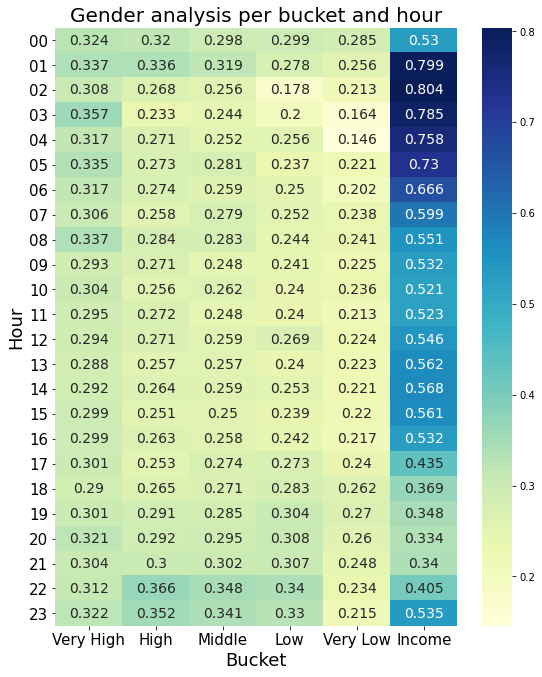

In [192]:
plot_pivot_table(table)


#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [9]:
# Type your code here
